### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 LinearSVM 과 같이 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'make_blobs() - 400 samples')

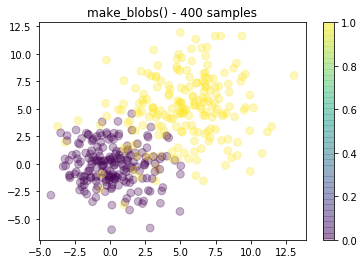

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(400, 2, [[0,0],[5,5]], [2,3])

plt.scatter(X[:,0], X[:,1], c=y, s=60, alpha=0.3)
plt.colorbar()
plt.title('make_blobs() - 400 samples')

In [12]:
%%time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
score

Wall time: 5 ms


In [5]:
display(model.coef_, model.intercept_)

array([[0.62395581, 0.68402527]])

array([-2.62647573])

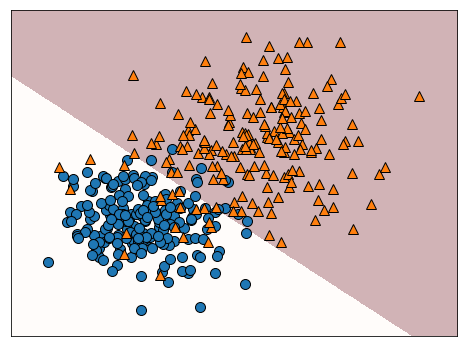

In [6]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### LinearSVM 적용

In [14]:
%%time

from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)
score = model.score(X, y)
score

Wall time: 38 ms


In [8]:
display(model.coef_, model.intercept_)

array([[0.20449524, 0.21992979]])

array([-0.89153273])

In [10]:
0.62395581/0.68402527

0.9121823964193603

In [11]:
0.20449524/21992979

9.298205577334476e-09

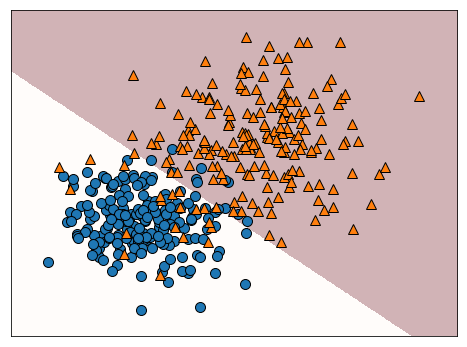

In [9]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

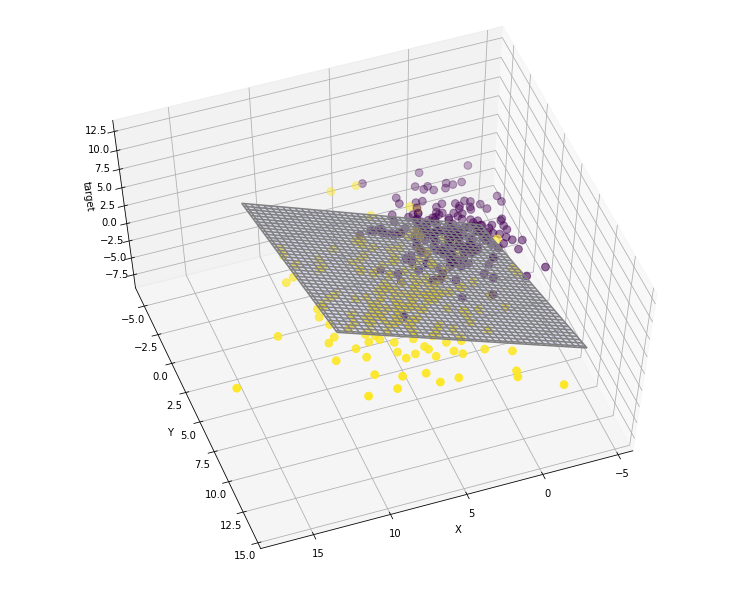

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                shade=True, alpha=0.1, color='b')
ax.plot_wireframe(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(60, 70)

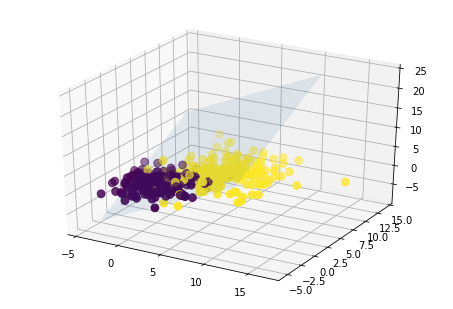

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

a = np.arange(-4, 12, 0.2)
b = np.arange(-4, 12, 0.2)
xx, yy = np.meshgrid(a,b)

ax.plot_surface(xx, yy, xx + yy, alpha=0.1)

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

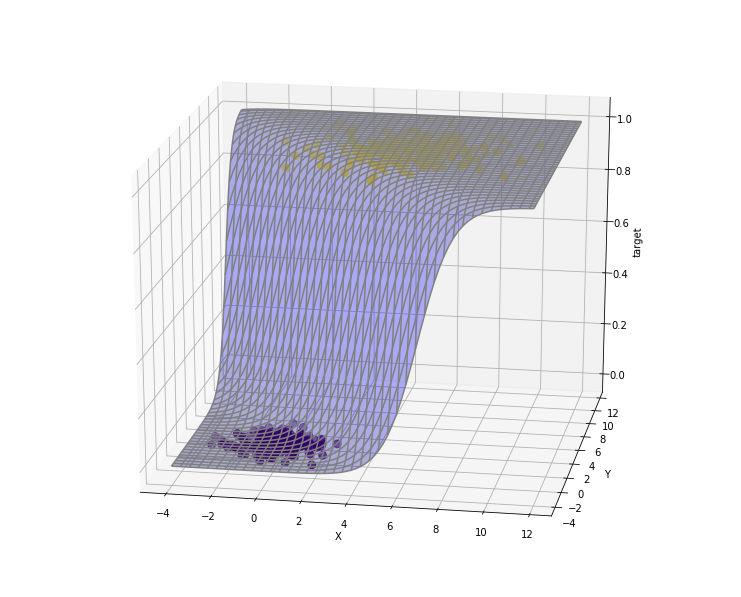

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                shade=True, alpha=0.3, color='b')
ax.plot_wireframe(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(20, -80)

In [74]:
display(model.predict_proba(X)[:10], y[:10])

array([[9.98664212e-01, 1.33578826e-03],
       [2.96447658e-03, 9.97035523e-01],
       [9.87513032e-03, 9.90124870e-01],
       [9.73755412e-01, 2.62445881e-02],
       [3.40304775e-05, 9.99965970e-01],
       [1.43541711e-06, 9.99998565e-01],
       [1.51971018e-04, 9.99848029e-01],
       [3.31922924e-04, 9.99668077e-01],
       [9.92520641e-01, 7.47935859e-03],
       [1.24521532e-04, 9.99875478e-01]])

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [77]:
model.decision_function(X)[:10]

array([-6.61689702,  5.81808591,  4.60781156, -3.61370036, 10.28822001,
       13.45405364,  8.79166875,  8.0102758 , -4.88810077,  8.99090738])

### 클래스가 3개인 경우

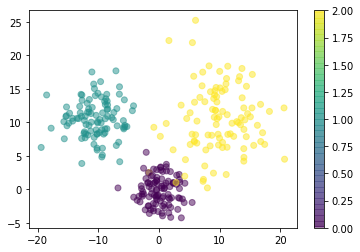

In [23]:
from sklearn.datasets import make_blobs

X, y = make_blobs(300, 2, [[0,0],[-10,10],[10,10]], [2,3,5])

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar()

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
score = model.score(X, y)
score

0.9866666666666667

In [25]:
display(model.coef_, model.intercept_)

array([[-0.10024555, -0.95938972],
       [-0.72267748,  0.20602421],
       [ 0.70052343,  0.40060211]])

array([ 2.96118885, -3.86595186, -3.56606985])

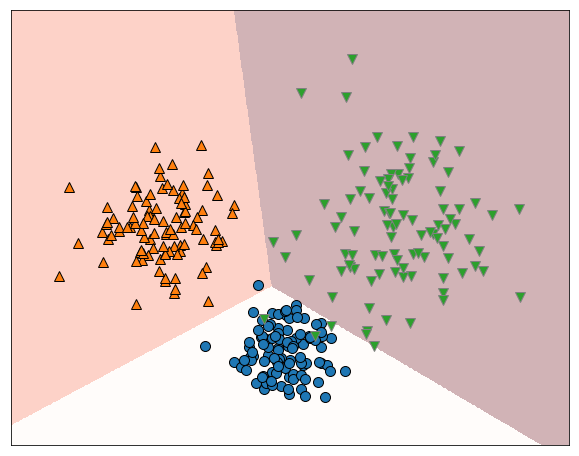

In [26]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

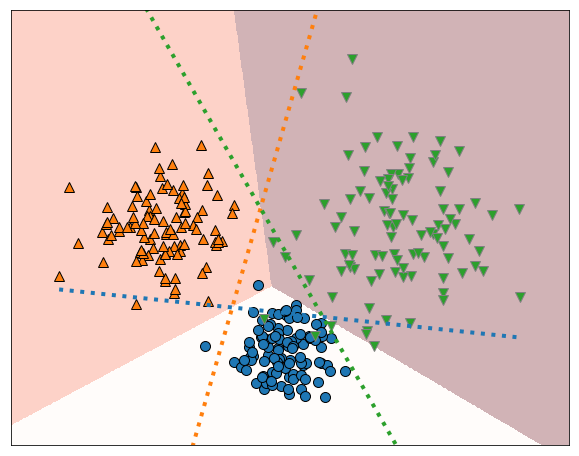

In [27]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4)

In [88]:
display(model.predict_proba(X)[:10], y[:10])

array([[9.08637445e-01, 8.79690768e-03, 8.25656473e-02],
       [9.43407738e-07, 1.47955517e-06, 9.99997577e-01],
       [4.43659230e-13, 1.41196151e-04, 9.99858804e-01],
       [1.23996289e-09, 7.38273103e-05, 9.99926171e-01],
       [6.89961417e-01, 1.09487949e-02, 2.99089788e-01],
       [9.13915063e-01, 2.56159636e-02, 6.04689737e-02],
       [9.97607700e-06, 9.84529047e-01, 1.54609766e-02],
       [1.24226334e-02, 9.82392858e-01, 5.18450821e-03],
       [6.16672824e-06, 1.28825548e-06, 9.99992545e-01],
       [2.14608768e-01, 3.85901847e-06, 7.85387373e-01]])

array([0, 2, 2, 2, 0, 0, 1, 1, 2, 2])

In [89]:
model.decision_function(X)[:10]

array([[  3.849533  ,  -4.64908729,  -2.32623558],
       [-13.87382384, -13.42382511,   9.72216291],
       [-28.44359127,  -8.86509091,  11.26204184],
       [-20.50822   ,  -9.51374362,   9.1200293 ],
       [  0.27512045,  -4.69936507,  -1.11805343],
       [  2.77143898,  -3.60848176,  -2.7120079 ],
       [-11.50643948,   4.99918745,  -4.14484329],
       [ -4.39417824,   3.30673565,  -5.27519282],
       [-11.99642906, -13.56231341,   9.20475404],
       [ -0.99125071, -12.23302721,   4.65037743]])

### Iris 데이터 - 속성 2개로 제한

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

col1 = 0
col2 = 1

X = iris.data[:, [col1,col2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

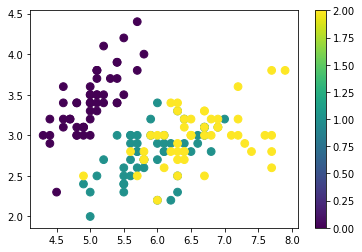

In [30]:
plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.colorbar()

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X, y)
score = model.score(X, y)
score

0.7666666666666667

In [40]:
display(model.coef_, model.intercept_)

array([[-2.49579289,  4.01011301],
       [ 0.49709451, -1.63380222],
       [ 1.15921404, -1.77736568]])

array([ 0.81713932,  1.22543562, -2.22516119])

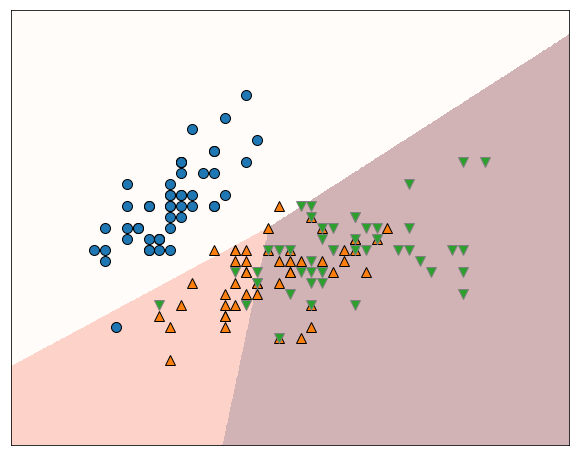

In [41]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

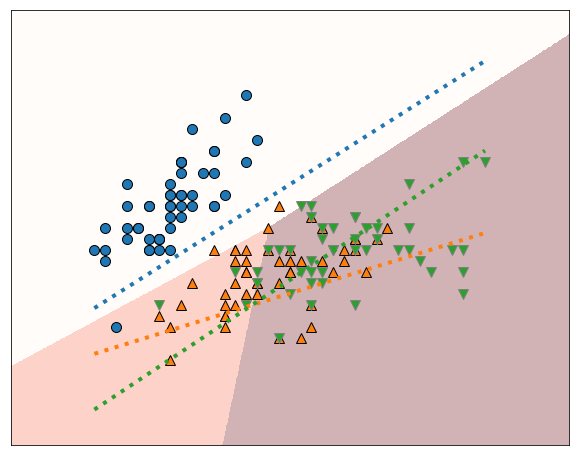

In [42]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(model.coef_[i,0]*rng + model.intercept_[i])/model.coef_[i,1], ':', lw=4)

### Iris 데이터 - 모든 속성 사용

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(score_train, score_test)

0.9732142857142857 0.9736842105263158


In [50]:
display(model.coef_, model.intercept_)

array([[ 0.4414795 ,  1.33125508, -2.13951591, -0.94791824],
       [ 0.32467881, -1.36853248,  0.64565195, -1.31801019],
       [-1.49002088, -1.62002665,  2.27462374,  2.31101624]])

array([ 0.27945499,  0.51055663, -0.89168367])

### 옵션(C) 변경 및 과적합 판단

Text(0,0.5,'score')

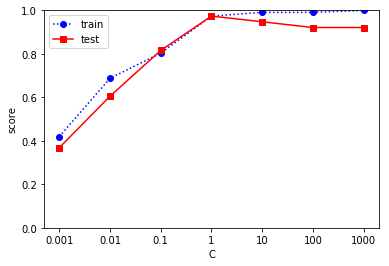

In [53]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

s1 = []
s2 = []

for c in Cs:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    s1.append(score_train)
    s2.append(score_test)
    
plt.plot(s1,'bo:')
plt.plot(s2,'rs-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)),Cs)
plt.ylim(0,1)
plt.xlabel('C')
plt.ylabel('score')

### 시그모이드(sigmoid) 함수 적용

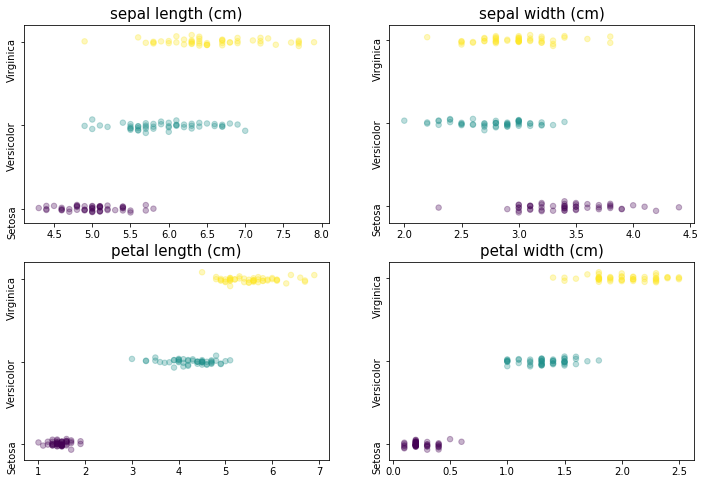

In [109]:
plt.figure(figsize=[12,8])

for col in range(4):
    plt.subplot(2,2,col+1)
    plt.scatter(iris.data[:,col], iris.target + np.random.normal(0,0.03,size=len(y)), c=iris.target, s=30, alpha=0.3)
    plt.yticks([0,1,2], ['Setosa', 'Versicolor', 'Virginica'], rotation=90)
    plt.title(iris.feature_names[col], fontsize=15)

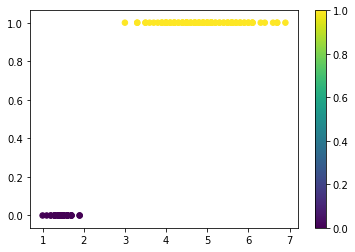

In [54]:
X = iris.data[:,[2]]
y = iris.target.copy(); y[y==2]=1

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

In [55]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0.5,1,'Sigmoid')

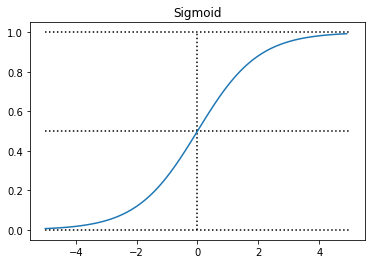

In [56]:
rng = np.arange(-5,5,0.1)
plt.plot(rng, sigmoid(rng))

plt.hlines([0,0.5,1],-5,5,linestyles='dotted')
plt.vlines([0],0,1,linestyles='dotted')
plt.title('Sigmoid')

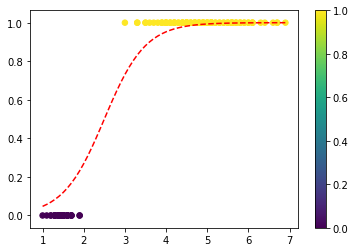

In [64]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, sigmoid(2*(rng-2.5)), 'r--')

In [65]:
model = LogisticRegression()
model.fit(X, y)

display(model.score(X, y), model.coef_, model.intercept_)

1.0

array([[1.72960591]])

array([-4.28674842])

Text(3,0.5,'boundary = 2.478')

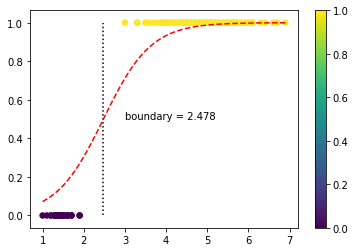

In [66]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, sigmoid(model.coef_[0,0]*rng+model.intercept_[0]), 'r--')
plt.vlines([-model.intercept_[0]/model.coef_[0,0]],0,1,linestyles='dotted')
plt.text(3, 0.5, 'boundary = %.3f' % (-model.intercept_[0]/model.coef_[0,0]))

### 관련 기술
- 공식
$$ sigmoid(t) = \frac{1}{1 + e^{-t}} $$
<br>
$$ t = w \cdot x + b $$
<br>
$$ sigmoid(t) = \frac{1}{1 + e^{-(w \cdot x + b)}} $$
<br>
$$ t = w_0 \cdot x_0 + w_1 \cdot x_1 + ... + b $$
- 소프트맥스(softmax) 함수
- 크로스 엔트로피 (cross entropy)